# Crimes In India - Phase 2

In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [3]:
a = pd.read_excel('pop.xlsx')
a.head()

,#,State,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy
0,-,India,1210854977,0.1764,3287240,382,940,74.04
1,1,Uttar Pradesh,199812341,0.2023,240928,829,912,67.68
2,2,Maharashtra,112374333,0.1599,307713,365,929,82.34
3,3,Bihar,104099452,0.2542,94163,1106,918,61.80
4,4,West Bengal,91276115,0.1384,88752,1028,950,76.26


In [4]:
b=pd.read_csv('crimes.csv')
b.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end,Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End,Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,Persons_Trial_Completed,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial,Unnamed: 16
0,Andaman & Nicobar Islands,2001,Rape,01. Rape,6,0,3,3,0,6,6,45,0,6,48,51,NaN
1,Andhra Pradesh,2001,Rape,01. Rape,1168,13,1150,1021,246,450,545,2191,34,1414,2597,3618,NaN
2,Arunachal Pradesh,2001,Rape,01. Rape,1,0,51,31,2,25,30,347,15,3,319,350,NaN
3,Assam,2001,Rape,01. Rape,403,14,928,585,120,806,959,2331,190,523,2283,2868,NaN
4,Bihar,2001,Rape,01. Rape,756,0,1400,1302,217,719,576,5963,241,973,5634,6936,NaN


In [7]:
a=a.replace('Andaman and Nicobar Islands','Andaman & Nicobar Islands')
a=a.replace('Dadra and Nagar Haveli','Dadra & Nagar Haveli')
a=a.replace('Daman and Diu','Daman & Diu')
a=a.replace('Orissa','Odisha')
a=a.replace('Jammu and Kashmir','Jammu & Kashmir')
a

,#,State,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy
0,-,India,1210854977,0.1764,3287240,382,940,74.04
1,1,Uttar Pradesh,199812341,0.2023,240928,829,912,67.68
2,2,Maharashtra,112374333,0.1599,307713,365,929,82.34
3,3,Bihar,104099452,0.2542,94163,1106,918,61.80
4,4,West Bengal,91276115,0.1384,88752,1028,950,76.26
5,5,Andhra Pradesh,84580777,0.1098,275045,308,993,67.02
6,6,Madhya Pradesh,72626809,0.2035,308252,236,931,69.32
7,7,Tamil Nadu,72147030,0.1561,130060,555,996,80.09
8,8,Rajasthan,68548437,0.2131,342239,200,928,66.11
9,9,Karnataka,61095297,0.1560,191791,319,973,75.36


In [17]:
a.rename(columns={'State': 'Area_Name'}, inplace=True)

c = pd.merge(b, a, on='Area_Name')

In [23]:
c.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,...,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial,Unnamed: 16,#,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy
0,Andaman & Nicobar Islands,2001,Rape,01. Rape,6,0,3,3,0,6,...,48,51,NaN,32,380581,0.0686,8249,46,876,86.63
1,Andhra Pradesh,2001,Rape,01. Rape,1168,13,1150,1021,246,450,...,2597,3618,NaN,5,84580777,0.1098,275045,308,993,67.02
2,Arunachal Pradesh,2001,Rape,01. Rape,1,0,51,31,2,25,...,319,350,NaN,27,1383727,0.2603,83743,17,938,65.38
3,Assam,2001,Rape,01. Rape,403,14,928,585,120,806,...,2283,2868,NaN,14,31205576,0.1707,78438,398,958,72.19
4,Bihar,2001,Rape,01. Rape,756,0,1400,1302,217,719,...,5634,6936,NaN,3,104099452,0.2542,94163,1106,918,61.80


# Now Let's start the Analysis for Phase 2

#### 2.1 Analysis of Literacy Rate vs Total Crimes.

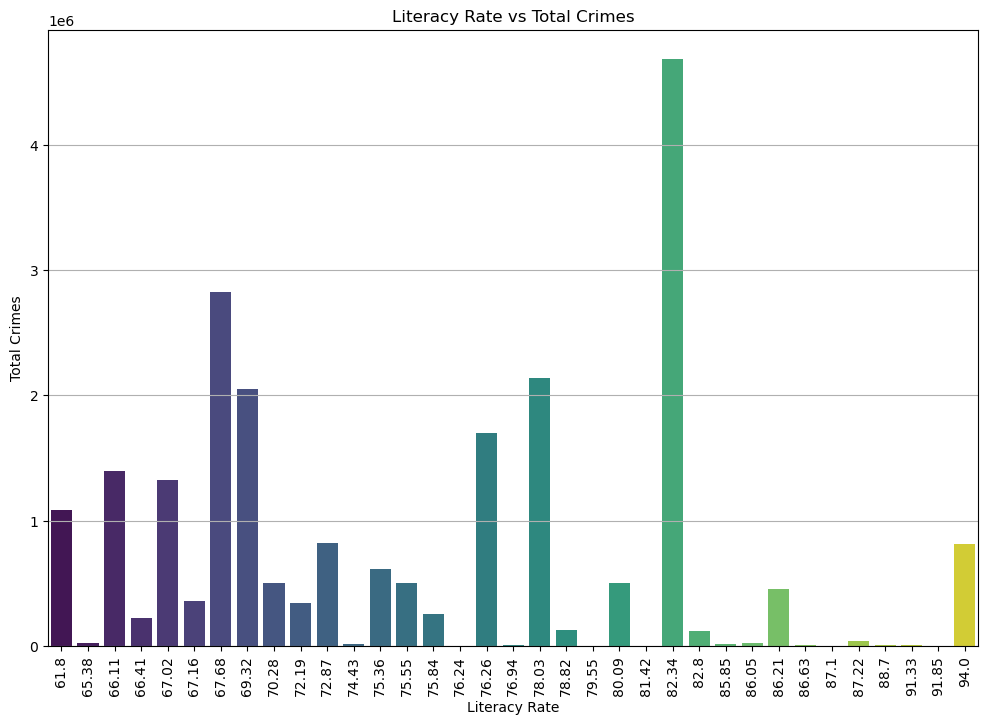

In [22]:
total_crimes_by_state = c.groupby('Area_Name')['Total_Persons_under_Trial'].sum().reset_index()

merged_data = pd.merge(total_crimes_by_state, c[['Area_Name', 'Literacy']], on='Area_Name')

merged_data.sort_values(by='Literacy', inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=merged_data, x='Literacy', y='Total_Persons_under_Trial', palette='viridis')
plt.title('Literacy Rate vs Total Crimes')
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

This barchart has shed light on the relationship between education and criminal behavior, we underscore the significance of educational policies and interventions in fostering safer and more prosperous communities.

#### 2.2	Analysis of the type of crime vs each state vs Literacy rate.

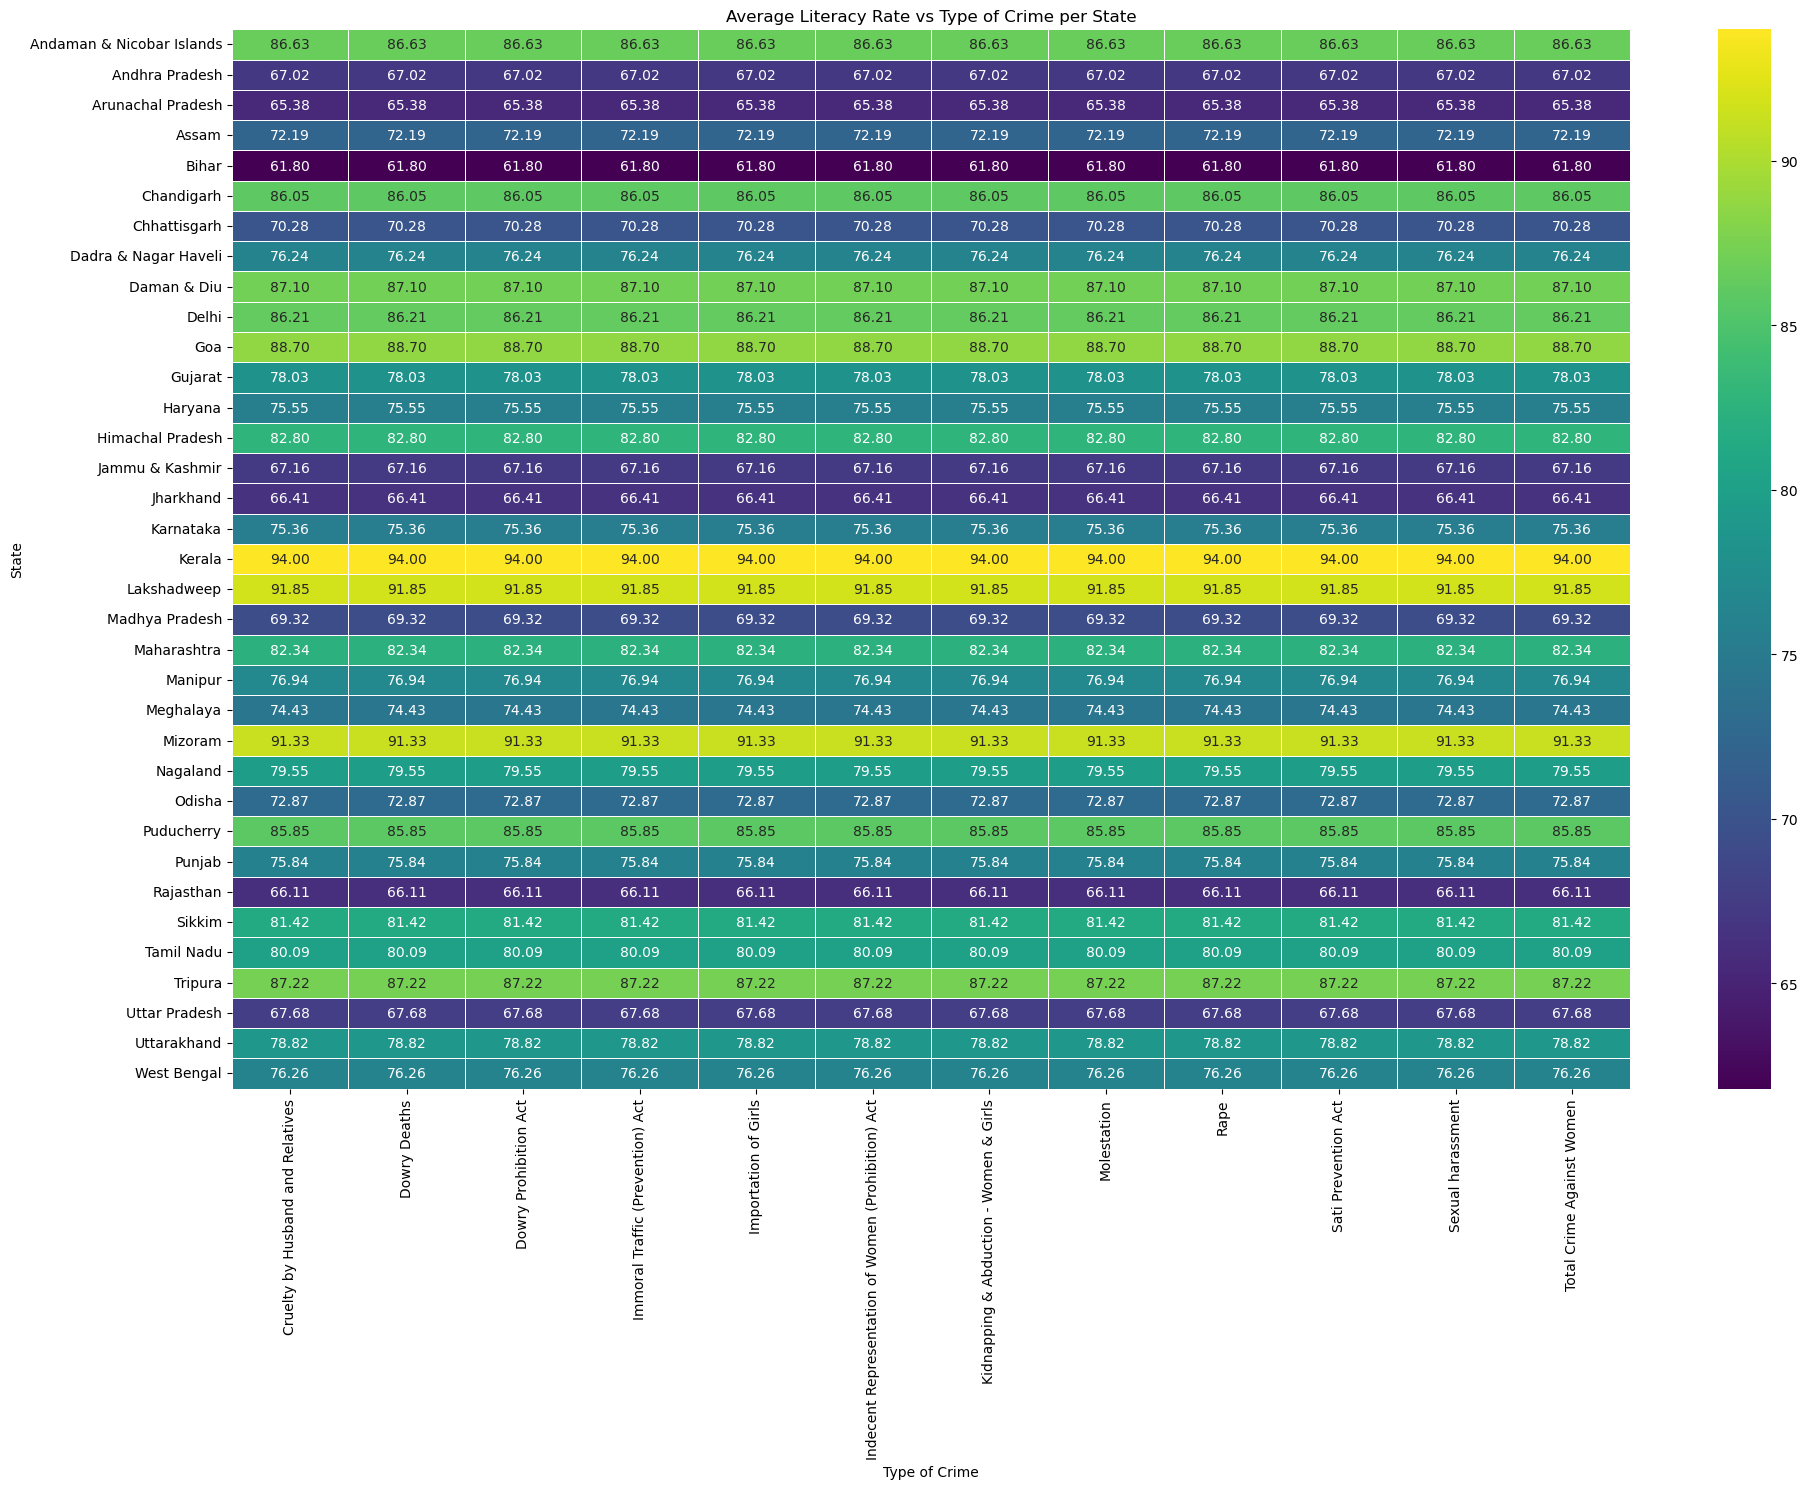

In [34]:

crime_literacy = c.groupby(['Area_Name', 'Group_Name'])['Literacy'].mean().reset_index()

crime_literacy_pivot = crime_literacy.pivot(index='Area_Name', columns='Group_Name', values='Literacy')

plt.figure(figsize=(20, 15))
sns.heatmap(crime_literacy_pivot, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Literacy Rate vs Type of Crime per State')
plt.xlabel('Type of Crime')
plt.ylabel('State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


The relationship between the type of crime, each state, and literacy rate is a complex interplay of social dynamics. Through meticulous analysis, patterns emerge revealing how literacy rates correlate with varying crime types across different states. Regions with higher literacy rates often exhibit lower instances of specific crimes, suggesting the potential impact of education on societal behavior. Conversely, areas with lower literacy rates may experience elevated levels of certain offenses. This intricate relationship underscores the importance of education as a determinant of community safety and highlights the need for targeted interventions to address disparities and foster a more equitable and secure society.

#### 2.3 Analysis of year-on-year total crime rate.

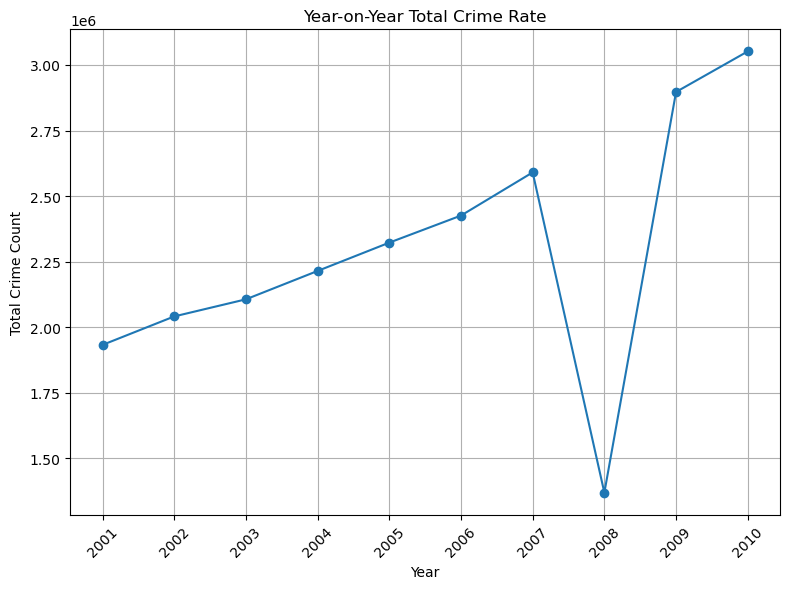

In [37]:
yearly_crime_count = c.groupby('Year')['Total_Persons_under_Trial'].sum()

plt.figure(figsize=(8, 6))
plt.plot(yearly_crime_count.index, yearly_crime_count.values, marker='o', linestyle='-')
plt.title('Year-on-Year Total Crime Rate')
plt.xlabel('Year')
plt.ylabel('Total Crime Count')
plt.grid(True)
plt.xticks(yearly_crime_count.index, rotation=45)
plt.tight_layout()
plt.show()

Looking upon the above plot, it's evident that as per our dataset, the Total Crime Count has dropped around 2008 but touched the peak on 2010 and other yeras has a moderate amount of crime rate.

#### 2.4 Analysis of area vs overall crime

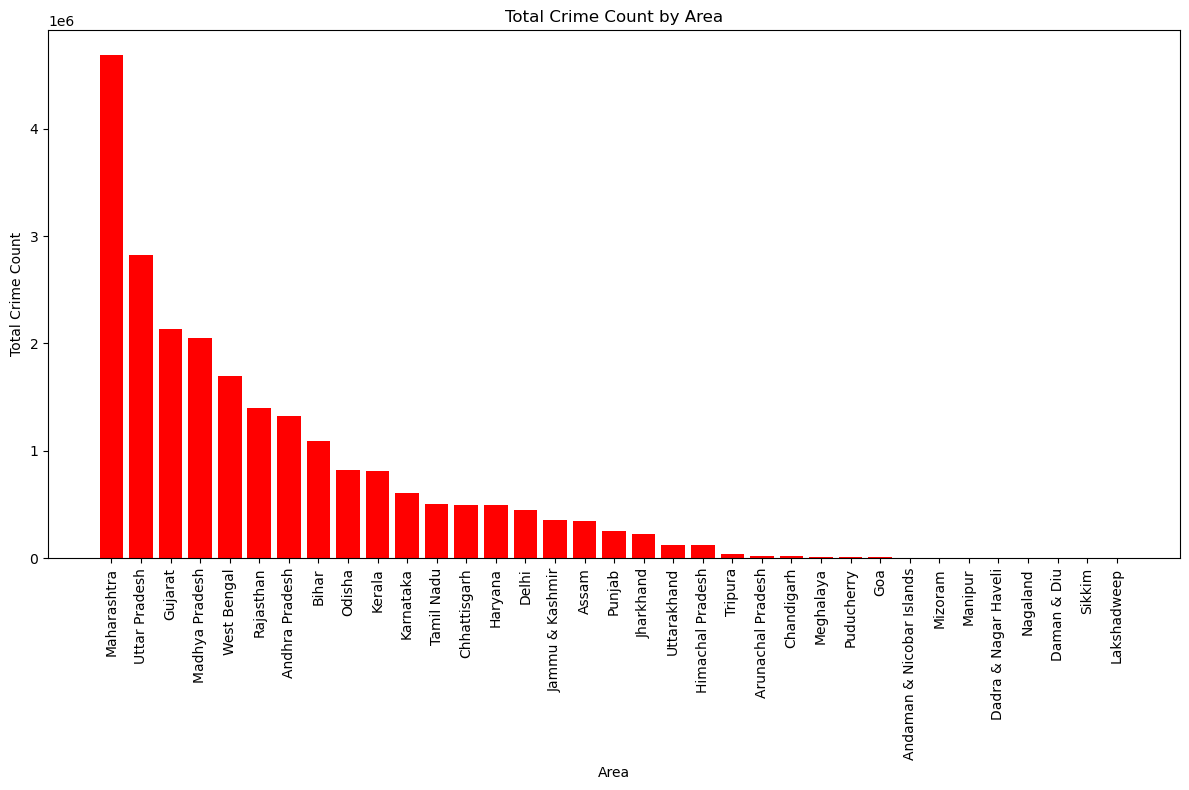

In [39]:
area_crime_count = c.groupby('Area_Name')['Total_Persons_under_Trial'].sum().reset_index()

area_crime_count_sorted = area_crime_count.sort_values(by='Total_Persons_under_Trial', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(area_crime_count_sorted['Area_Name'], area_crime_count_sorted['Total_Persons_under_Trial'], color='red')
plt.title('Total Crime Count by Area')
plt.xlabel('Area')
plt.ylabel('Total Crime Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The analysis reveals distinct disparities in overall crime rates across Indian states and union territories. Maharashtra, Uttar Pradesh, Gujarat, Madhya Pradesh, and West Bengal emerge as areas with notably higher crime incidences, suggesting potential hotspots for law enforcement and community intervention efforts. Conversely, Tripura, Arunachal Pradesh, Chandigarh, and others exhibit comparatively lower crime rates, indicating relative safety and potential models for effective crime prevention strategies. Understanding these regional variations underscores the importance of tailored approaches to law enforcement and social development initiatives. By addressing root causes and leveraging best practices from low-crime areas, policymakers can strive towards fostering safer communities and mitigating crime nationwide.

#### 2.5 Analysis of Population vs overall Crime.

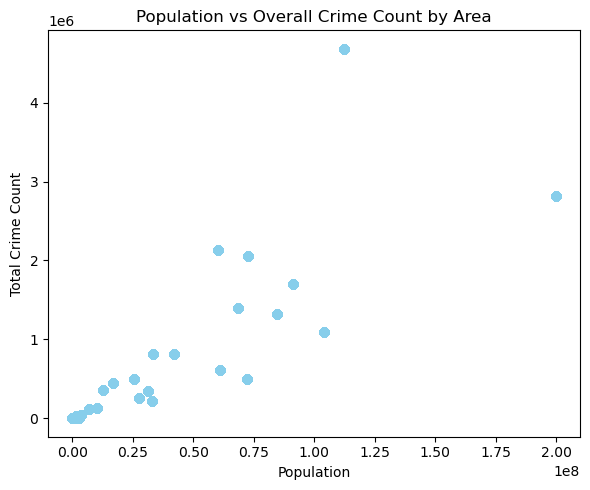

In [67]:
area_crime_count = c.groupby('Area_Name')['Total_Persons_under_Trial'].sum().reset_index()

# Merge the crime count data with the population data
merged_data = pd.merge(area_crime_count, c[['Area_Name', 'Population']], on='Area_Name')

# Sort the data by total crime count in descending order
merged_data_sorted = merged_data.sort_values(by='Total_Persons_under_Trial', ascending=False)

# Visualization
plt.figure(figsize=(6, 5))
plt.scatter(merged_data_sorted['Population'], merged_data_sorted['Total_Persons_under_Trial'], color='skyblue')
plt.title('Population vs Overall Crime Count by Area')
plt.xlabel('Population')
plt.ylabel('Total Crime Count')

plt.tight_layout()
plt.show()

Looking upon this plot, with our dataset, it looks like , the Crime Count is very high indeed if the population is high, like we see in the above plot, for Population between 1-1.25 the Total Crime Count is above 4. And for population between 0-0.25 range , the Crime Count is relatively less.

# Crime Report

This comprehensive report offers a detailed analysis of crime trends across various states and union territories in India. Through a series of analyses conducted on available datasets, this report delves into multiple aspects of crime, including overall crime rates, population dynamics, types of crime, and year-on-year trends. By examining these factors, we aim to provide valuable insights into the state of law enforcement and public safety in different regions of the country.

#### Overall Crime Rates

The analysis of overall crime rates reveals significant disparities among states and union territories. States like Maharashtra, Uttar Pradesh, Gujarat, Madhya Pradesh, and West Bengal exhibit higher crime rates, while others such as Tripura, Arunachal Pradesh, and Chandigarh demonstrate relatively lower crime incidences.

#### Population vs. Crime

A scatter plot was employed to investigate the relationship between population size and overall crime count for each area. Surprisingly, no clear correlation was observed between population size and crime incidence, suggesting that additional factors beyond population contribute to variations in crime rates.

#### Types of Crime

An examination of different types of crime across states highlighted variations in crime prevalence. By analyzing specific crime categories against literacy rates, insights were gained into the potential socio-economic factors influencing crime patterns.

#### Year-on-Year Trends

Analysis of year-on-year crime rates provided insights into the temporal dynamics of crime in different regions. Understanding these trends can inform policy decisions and resource allocation to address emerging challenges effectively.

#### Conclusion

In conclusion, this report offers valuable insights into the complex dynamics of crime across Indian states and union territories. By identifying high-crime areas, understanding underlying factors, and monitoring trends over time, policymakers can develop targeted strategies to enhance public safety and foster community well-being nationwide.